In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


def moving_average(a, n=3) :
    weights = np.repeat(1.0, n)/n
    sma = np.convolve(a, weights, 'full')
    return sma[:-(n-1)]

Error std: 110.032231


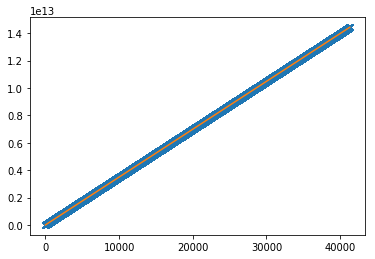

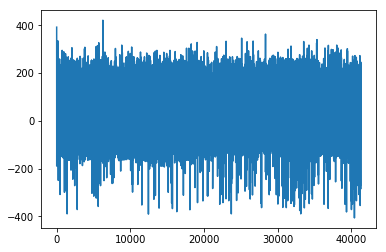

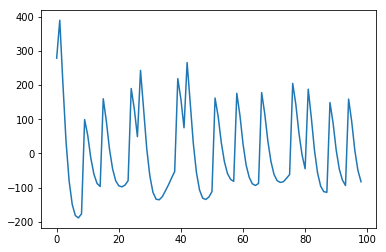

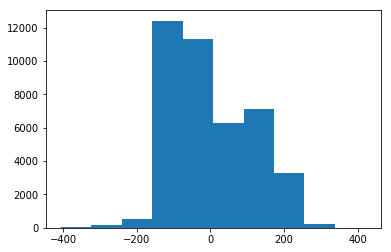

In [107]:
fname = 'servo_delayed_100ms.txt'

T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation = est-ptp;
print "Error std: %f" % np.std(deviation)

# first timestamp is the reference
plot(ptp,'x')
plot(est)
show();

# plot timestamp difference
plt.plot(deviation);
show();
plot(deviation[1:100]);
show();
hist(deviation);
show();



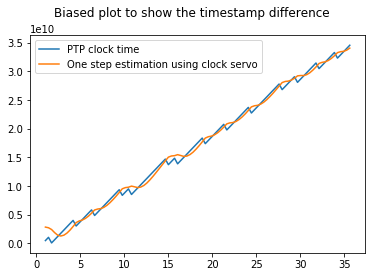

In [108]:
# make the devations from the linear regression more visible

h = hw[0:100]/1e9;
e = est[0:100];
p = ptp[0:100];

# cal linear regression
m,b = np.polyfit(h,p,1);
linreg = m*h+b;

de = e - linreg;
dp = p - linreg;

e2 = linreg + 6000000*de;
p2 = linreg + 6000000*dp;

plot(h,p2,label = 'PTP clock time');
plot(h,e2, label='One step estimation using clock servo');
suptitle("Biased plot to show the timestamp difference")
legend();

In [109]:
fname = 'tk_log_100ms.txt'

T = np.genfromtxt(fname, delimiter=',',dtype='uint64')
tk_ptp = T[2:,0];
tk_hw = T[2:,1];
tk_est = T[2:,2];

# subtract first value to be able to use 32 bit float float
t = tk_ptp[0];
tk_ptp = np.array(tk_ptp - t,dtype='float');
tk_hw = np.array(tk_hw,dtype='float');
tk_est = np.array(tk_est - t,dtype='float');


In [110]:
print sum(tk_ptp != ptp)
print sum(tk_hw != hw)
print sum(tk_est != est)

0
0
0
